In [1]:
pip install pandas numpy nltk textblob matplotlib seaborn wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Deviare
[nltk_data]     User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Deviare
[nltk_data]     User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Deviare User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
# Load the dataset
# Assuming you have a CSV file with job descriptions
df = pd.read_csv('job_postings (1).csv')

In [5]:
# Display first few rows and basic information
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Overview:
                          Job_Title  \
0              Full Stack Developer   
1              Full Stack Developer   
2  Full Stack Developer - Delhi NCR   
3              Full Stack Developer   
4              Full-Stack Developer   

                                   Company_Name  \
0                                      AM2 Tech   
1                                     TechNiera   
2                              Yes HR Solutions   
3                                        Spehre   
4  Futorom Examination Services Private Limited   

                        Location Experience_Level    Salary_Range  \
0  Coimbatore Bypass  Coimbatore      4 - 5 Years  3.0-4.3 Lac/Yr   
1           Raipur  Chhattisgarh      0 - 2 Years  2.5-4.0 Lac/Yr   
2                      Delhi NCR      3 - 7 Years  4.5-8.5 Lac/Yr   
3                         Jaipur      0 - 1 Years   Not Disclosed   
4         Rohini Sector 9  Delhi      2 - 8 Years  5.0-7.0 Lac/Yr   

                         

In [6]:
# Define stop words
stop_words = set(stopwords.words('english'))
# Add custom stop words relevant to job descriptions
stop_words.update(['experience', 'job', 'work', 'company', 'team', 'role'])

In [7]:
# Function to clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = ' '.join(text.split())
    return text

In [8]:
# Clean job descriptions
df['cleaned_description'] = df['Job_Title'].apply(clean_text)

In [9]:
# Tokenize and get most common words
all_words = []
for desc in df['cleaned_description']:
    words = word_tokenize(desc)
    words = [word for word in words if word not in stop_words]
    all_words.extend(words)

In [10]:
# Get word frequency
word_freq = FreqDist(all_words)
common_words_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

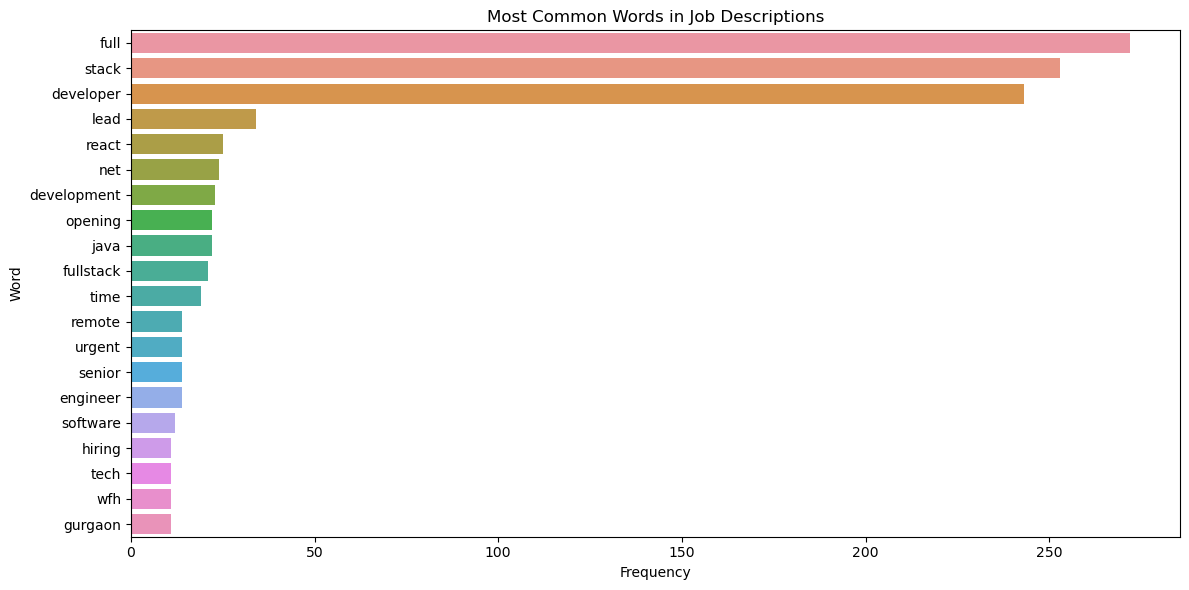

In [11]:
# Plot most common words
plt.figure(figsize=(12, 6))
sns.barplot(data=common_words_df, x='Frequency', y='Word')
plt.title('Most Common Words in Job Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

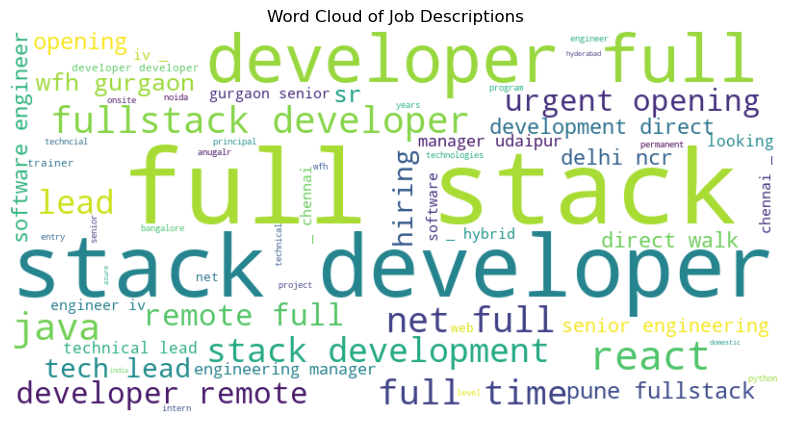

In [12]:
# Create word cloud
text = ' '.join(df['cleaned_description'])
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Descriptions')
plt.show()

In [13]:
# Skill extraction
# Define common technical skills
common_skills = [
    'python', 'java', 'javascript', 'sql', 'aws', 'docker',
    'kubernetes', 'machine learning', 'ai', 'data science',
    'react', 'nodejs', 'azure', 'git', 'devops',
    'tensorflow', 'pytorch', 'nlp', 'deep learning'
]

In [14]:
# Function to extract skills from text
def extract_skills(text):
    text = text.lower()
    found_skills = []
    for skill in common_skills:
        if skill in text:
            found_skills.append(skill)
    return found_skills

In [15]:
# Extract skills from job descriptions
df['skills'] = df['Skills_Required'].apply(extract_skills)

In [16]:
# Get skill frequency
all_skills = []
for skills_list in df['skills']:
    all_skills.extend(skills_list)

skill_freq = FreqDist(all_skills)
skills_df = pd.DataFrame(skill_freq.most_common(), columns=['Skill', 'Frequency'])

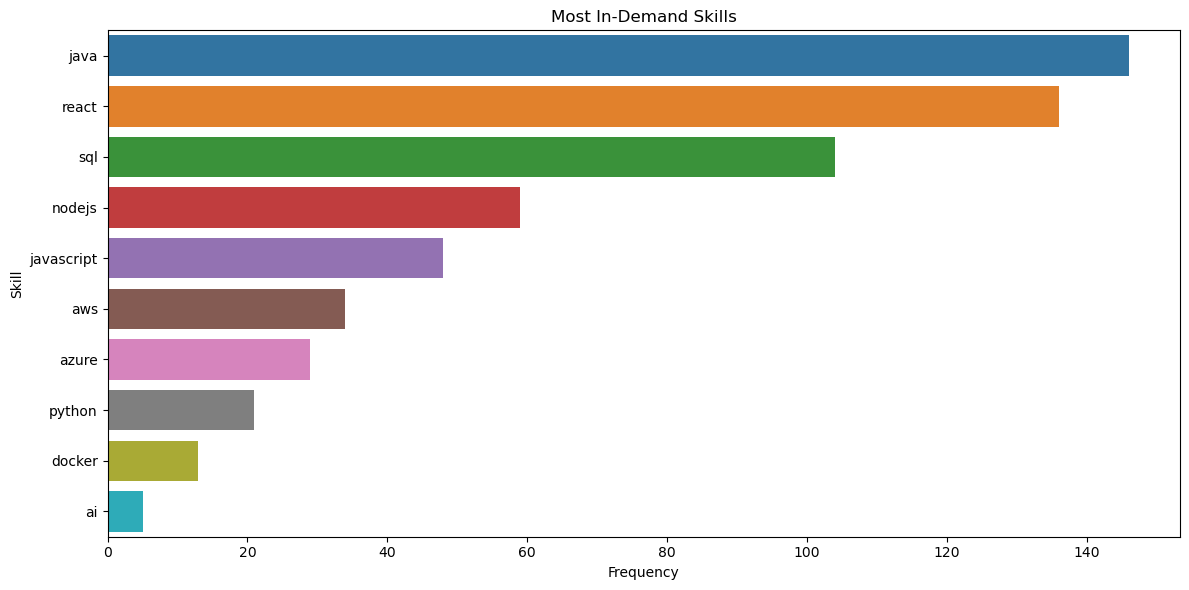

In [17]:
# Plot skill demand
plt.figure(figsize=(12, 6))
sns.barplot(data=skills_df, x='Frequency', y='Skill')
plt.title('Most In-Demand Skills')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

In [18]:
df.columns

Index(['Job_Title', 'Company_Name', 'Location', 'Experience_Level',
       'Salary_Range', 'Skills_Required', 'Job_Description', 'Industry',
       'Employment_Type', 'cleaned_description', 'skills'],
      dtype='object')

In [19]:
# Sentiment Analysis
df['sentiment_score'] = df['Job_Title'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)
df['sentiment_category'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)

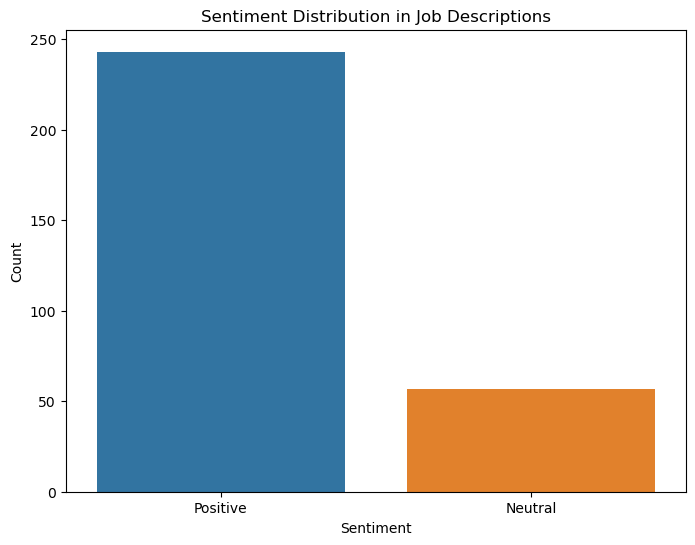

In [20]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment_category')
plt.title('Sentiment Distribution in Job Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


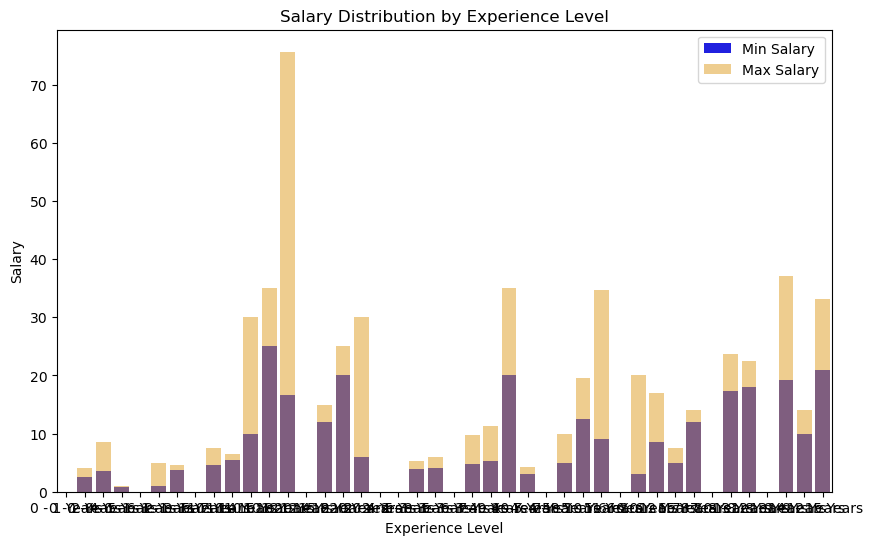

In [21]:
# Extracting numeric values from the Salary_Range

def extract_salary_range(salary_range):
    match = re.findall(r'\d+\.\d+|\d+', salary_range)
    return [float(s) for s in match] if match else [None, None]

salary_ranges = df['Salary_Range'].apply(extract_salary_range)
df['Min_Salary'] = salary_ranges.apply(lambda x: x[0])
df['Max_Salary'] = salary_ranges.apply(lambda x: x[1])
salary_by_experience = df.groupby('Experience_Level')[['Min_Salary', 'Max_Salary']].mean().reset_index()

# Visualize salary distribution by experience level
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_by_experience, x='Experience_Level', y='Min_Salary', color='blue', label='Min Salary')
sns.barplot(data=salary_by_experience, x='Experience_Level', y='Max_Salary', color='orange', label='Max Salary', alpha=0.5)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [22]:
# Basic statistics of salary by experience level
salary_stats = df.groupby('Experience_Level')['Salary_Range'].describe()
print("\nSalary Statistics by Experience Level:")
salary_stats


Salary Statistics by Experience Level:


,count,unique,top,freq
Experience_Level,,,,
0 - 1 Years,4,1,Not Disclosed,4
0 - 2 Years,4,2,2.5-4.0 Lac/Yr,2
0 - 4 Years,4,1,3.5-8.5 Lac/Yr,4
0 - 5 Years,3,1,0.8-0.9 Lac/Yr,3
0 - 6 Years,6,1,Not Disclosed,6
1 - 2 Years,4,2,1.0-5.0 Lac/Yr,2
1 - 3 Years,4,2,2.0-2.5 Lac/Yr,3
1 - 5 Years,3,1,Not Disclosed,3
1 - 7 Years,12,4,0.8-5.0 Lac/Yr,6


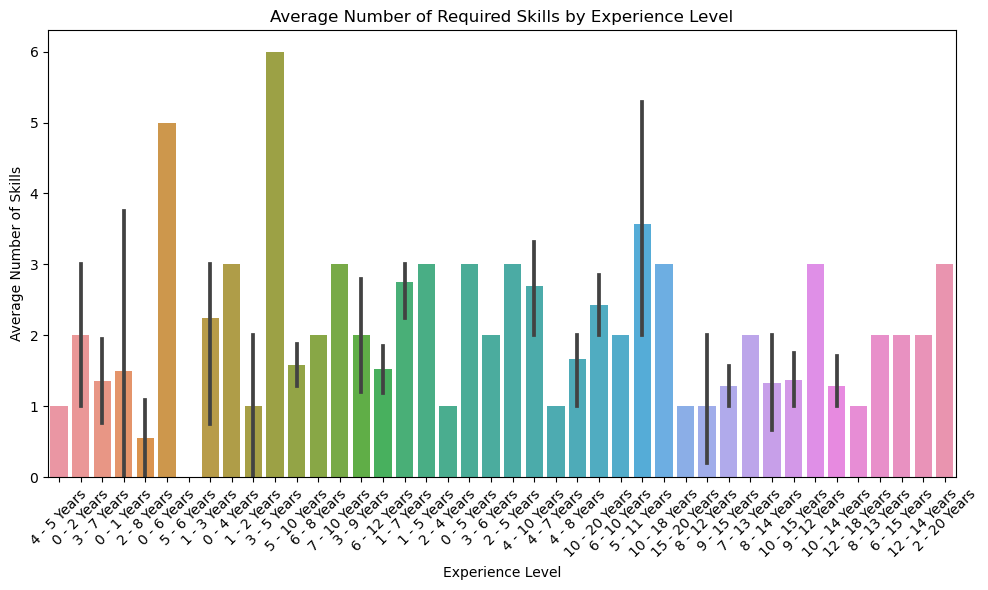

In [23]:
# Skill count per job
df['skill_count'] = df['skills'].apply(len)

# Plot average skill requirements by experience level
plt.figure(figsize=(10, 6))
sns.barplot(x='Experience_Level', y='skill_count', data=df)
plt.title('Average Number of Required Skills by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Number of Skills')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Print most common skill combinations
from itertools import combinations
skill_combinations = []
for skills_list in df['skills']:
    if len(skills_list) >= 2:
        skill_combinations.extend(list(combinations(sorted(skills_list), 2)))

combo_freq = FreqDist(skill_combinations)
common_combos = pd.DataFrame(combo_freq.most_common(10), 
                           columns=['Skill Combination', 'Frequency'])
print("\nMost Common Skill Combinations:")
print(common_combos)


Most Common Skill Combinations:
      Skill Combination  Frequency
0         (java, react)         66
1          (react, sql)         62
2           (java, sql)         50
3    (java, javascript)         48
4        (java, nodejs)         44
5       (nodejs, react)         30
6  (javascript, nodejs)         28
7   (javascript, react)         27
8         (nodejs, sql)         24
9          (aws, react)         24


## Task 3 ##

In [25]:
pip install streamlit pandas matplotlib seaborn wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px



# Function to display bar plot for job title distribution
def plot_job_title_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Job_Title', order=df['Job_Title'].value_counts().index, palette="viridis")
    plt.title('Job Title Distribution')
    st.pyplot()

In [30]:
# Function to display experience level distribution
def plot_experience_level_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Experience_Level', order=df['Experience_Level'].value_counts().index, palette="coolwarm")
    plt.title('Experience Level Distribution')
    st.pyplot()

In [28]:
# Function to create a word cloud of skills
def plot_skill_wordcloud(df):
    # Combine all skills into a single string
    all_skills = ' '.join(df['skills'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)
    
    # Display the word cloud
    st.image(wordcloud.to_array(), caption="Skill Word Cloud")

# Streamlit UI elements
st.title('Exploratory Data Analysis (EDA) Results')

# Selectbox for job title filter
job_title_filter = st.selectbox("Select Job Title", options=['All'] + df['Job_Title'].unique().tolist())

# Selectbox for experience level filter
experience_level_filter = st.selectbox("Select Experience Level", options=['All'] + df['Experience_Level'].unique().tolist())

# Apply filters based on user selection
if job_title_filter != 'All':
    df = df[df['job_title'] == job_title_filter]

if experience_level_filter != 'All':
    df = df[df['Experience_Level'] == experience_level_filter]

# Display filtered data
st.write("Filtered Data:")
st.dataframe(df)

# Visualizations
st.subheader("Job Title Distribution")
plot_job_title_distribution(df)

st.subheader("Experience Level Distribution")
plot_experience_level_distribution(df)

st.subheader("Skills Word Cloud")
plot_skill_wordcloud(df)

# Optional: Use Plotly for interactive charts if needed
st.subheader("Experience Level vs Job Title (Interactive)")
fig = px.histogram(df, x='Experience_Level', color='Job_Title', barmode='stack', title="Experience Level vs Job Title")
st.plotly_chart(fig)

2024-12-09 08:46:07.712 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


KeyError: 'experience_level'